# U.S. GDP

Sources: St.Lous FRED, Our World In Data

## 2020

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('GDP.xlsx', sheet_name='Advance', header=6, index_col=1)
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
df.dropna(axis=0, inplace=True)

In [3]:
df

,2020Q1,Apr.,May,Jun.,2020Q2,Jul.,Aug.,Sep.,2020Q3,Source
Gross Domestic Product,21561.1,…,…,…,19520.1,…,…,…,21157.6,NIPA
Personal consumption expenditures \1\,14545.5,12112.1,13165.4,14014.6,13097.3,14229,14376.9,14578.4,14394.8,NIPA
Goods,4552.9,3890.8,4447.8,4745.9,4361.5,4818.6,4824,4921.3,4854.6,NIPA
Domestic new autos,35.6,23.1,29.5,31.4,28,37.8,39,41.5,39.4,NIPA
Unit sales (millions of units at annual rates),2.9,1.5,1.9,2.1,1.8,2.7,2.7,2.9,2.8,Ward's
...,...,...,...,...,...,...,...,...,...,...
Gross investment,453.6,…,…,…,449.6,…,…,…,452.2,NIPA
Structures \20\,362,…,…,…,360.7,…,…,…,357.5,NIPA
Construction spending (value put in place) (annual rates),328.6,324.8,330.2,326,327,321.1,323.2,322.2,322.2,Census
Equipment,49.1,…,…,…,48.3,…,…,…,52.7,NIPA


In [4]:
gdp = {}
for col in df.columns:
    if 'Q' in col:
        gdp[col] = df[col][0]

In [5]:
gdp

{'2020Q1': 21561.1, '2020Q2': 19520.1, '2020Q3': 21157.6}

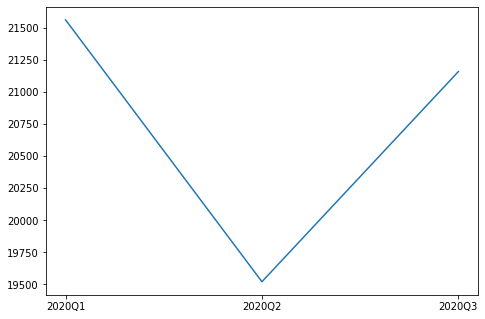

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,1,1,1])
ax.plot(gdp.keys(), gdp.values())

# GDP Over Time

In [7]:
df = pd.read_csv('GDP_Over_Time.csv')

In [8]:
df

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
290,2019-07-01,21540.325
291,2019-10-01,21747.394
292,2020-01-01,21561.139
293,2020-04-01,19520.114


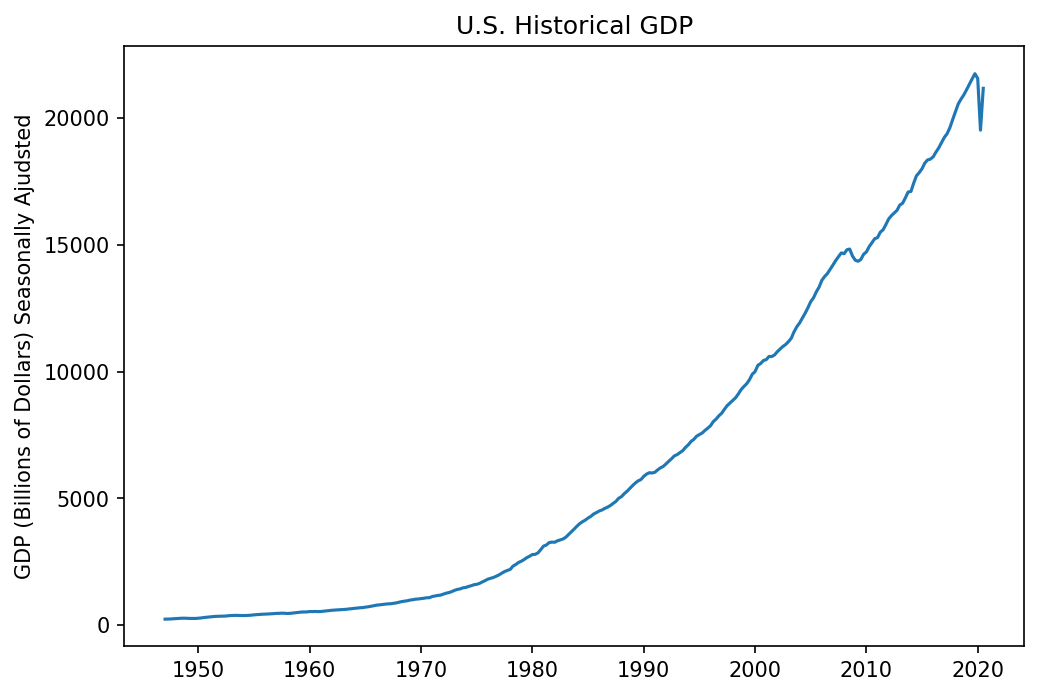

In [9]:
fig = plt.figure(dpi=150)
ax = fig.add_axes([0,0,1,1])
ax.set_title('U.S. Historical GDP')
ax.set_ylabel('GDP (Billions of Dollars) Seasonally Ajudsted')
ax.plot(pd.to_datetime(df['DATE']), df['GDP'])

## U.S. vs. Other Major Nations

In [10]:
df = pd.read_csv('world_gdp.csv')

In [11]:
df.columns = ['Country', 'Code', 'Year', 'GDP']

In [12]:
df

,Country,Code,Year,GDP
0,Afghanistan,AFG,1950,2392
1,Afghanistan,AFG,1951,2422
2,Afghanistan,AFG,1952,2462
3,Afghanistan,AFG,1953,2568
4,Afghanistan,AFG,1954,2576
...,...,...,...,...
17707,Zimbabwe,ZWE,2012,1604
17708,Zimbabwe,ZWE,2013,1604
17709,Zimbabwe,ZWE,2014,1594
17710,Zimbabwe,ZWE,2015,1560


In [13]:
df = df.pivot(index='Year', columns='Country', values='GDP').fillna(0)
df

Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,1945.0,9592.0,13379.0,8190.0,19599.0,9077.0,46999.0,41565.0,16359.0,36949.0,...,68255.0,35185.0,50394.0,17876.0,7928.0,18549.0,4984.0,4077.0,3350.0,1604.0
2013,2025.0,9660.0,13494.0,8508.0,19873.0,9385.0,47250.0,41375.0,17133.0,38493.0,...,70791.0,35618.0,50863.0,18589.0,8482.0,21429.0,5200.0,4165.0,3419.0,1604.0
2014,2022.0,9808.0,13744.0,8673.0,19183.0,9735.0,47867.0,41338.0,17439.0,39799.0,...,72601.0,36436.0,51664.0,19160.0,9085.0,20317.0,5455.0,4054.0,3478.0,1594.0


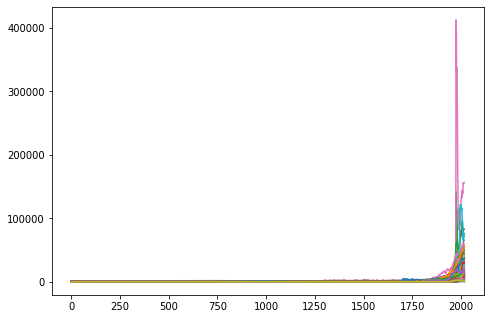

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(df);